<a href="https://colab.research.google.com/github/FaridRash/Advance-Statistical-Learnin--Semester-3/blob/main/MH/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Git

In [56]:
!git clone https://github.com/FaridRash/Advance-Statistical-Learnin--Semester-3

fatal: destination path 'Advance-Statistical-Learnin--Semester-3' already exists and is not an empty directory.


#Data Reading

In [57]:
import pandas as pd

df = pd.read_csv('/content/Advance-Statistical-Learnin--Semester-3/Dataset/df_Final.csv')
display(df.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,spinale,1.0,>80,0.0,0,0.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,spinale,1.0,40-60,0.0,0,0.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,bulbare,1.0,>80,0.0,0,0.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [58]:
display(df.columns)

Index(['Patient_ID', 'Visit_ID', 'Sex', 'Age_at_onset', 'Clinical_onset_type',
       'Spirometry', 'FVC', 'Ventilation', 'Tracheostomy', 'PEG', 'Therapy',
       'Diagnostic_delay', 'MRC_Upper_Limb', 'MRC_Lower_Limb', 'MRC_Bulbar',
       'PUMNS_Upper_Limb', 'PUMNS_Lower_Limb', 'PUMNS_Bulbar',
       'CNS_Linear_Score', 'KINGS_Total', 'Disease_duration',
       'Progression_rate', 'ALSFRS_R', 'ALSAQ_5'],
      dtype='object')

#PreProccessing

In [59]:
"""
Ordinal Data:
FVC


Nominal Data:
Tracheostomy - Therapy - Ventilation - PEG - Clinical_onset_type - Spirometry




"""

'\nOrdinal Data:\nFVC\n\n\nNominal Data:\nTracheostomy - Therapy - Ventilation - PEG - Clinical_onset_type - Spirometry\n\n\n\n\n'

##TreeBase

### Encoding

In [60]:
from sklearn.preprocessing import LabelEncoder

# Select the nominal columns for encoding
nominal_cols = ['Tracheostomy', 'Therapy', 'Ventilation', 'PEG', 'Clinical_onset_type','Spirometry','FVC']

# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Apply Label Encoding to each nominal column
for col in nominal_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Display the first few rows of the new DataFrame to verify
display(df_encoded.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,3,1,3,0,0,0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,3,1,0,0,0,0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,0,1,3,0,0,0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,3,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,3,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [61]:
# Drop the 'Patient_ID' column
df_encoded = df_encoded.drop('Patient_ID', axis=1)

# Display the first few rows to verify
display(df_encoded.head())

,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Therapy,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,3,0,19.0,3,1,3,0,0,0,1,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,1,0,65.0,3,1,0,0,0,0,3,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,1,1,79.0,0,1,3,0,0,0,3,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,1,0,51.0,3,1,3,0,0,0,1,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,2,0,51.0,3,1,3,0,0,0,1,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [62]:
# Drop the 'Visit_ID' column
df_encoded = df_encoded.drop('Visit_ID', axis=1)

# Display the first few rows to verify
display(df_encoded.head())

,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Therapy,Diagnostic_delay,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,0,19.0,3,1,3,0,0,0,1,33.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,0,65.0,3,1,0,0,0,0,3,14.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,1,79.0,0,1,3,0,0,0,3,6.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,0,51.0,3,1,3,0,0,0,1,18.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,0,51.0,3,1,3,0,0,0,1,18.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


###PreProccessing

In [63]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop('KINGS_Total', axis=1)
y = df_encoded['KINGS_Total']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1129, 21)
Testing set shape: (283, 21)


In [64]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training data shape after scaling:", X_train_scaled.shape)
print("Testing data shape after scaling:", X_test_scaled.shape)

Training data shape after scaling: (1129, 21)
Testing data shape after scaling: (283, 21)


###Modeling

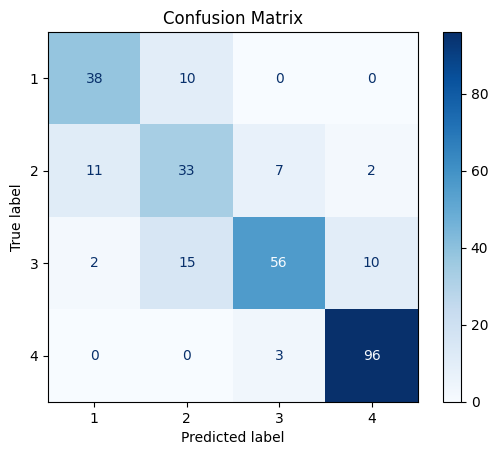

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions with your best model
y_pred = best_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Feature Importances:
                Feature  Importance
19             ALSFRS_R    0.189366
5           Ventilation    0.144577
20              ALSAQ_5    0.080069
18     Progression_rate    0.060531
10       MRC_Upper_Limb    0.059885
12           MRC_Bulbar    0.053669
11       MRC_Lower_Limb    0.051107
1          Age_at_onset    0.048873
14     PUMNS_Lower_Limb    0.046234
17     Disease_duration    0.045269
4                   FVC    0.042439
13     PUMNS_Upper_Limb    0.040293
9      Diagnostic_delay    0.037978
15         PUMNS_Bulbar    0.024152
16     CNS_Linear_Score    0.021887
8               Therapy    0.013609
0                   Sex    0.009739
2   Clinical_onset_type    0.009369
6          Tracheostomy    0.007956
7                   PEG    0.007046
3            Spirometry    0.005955


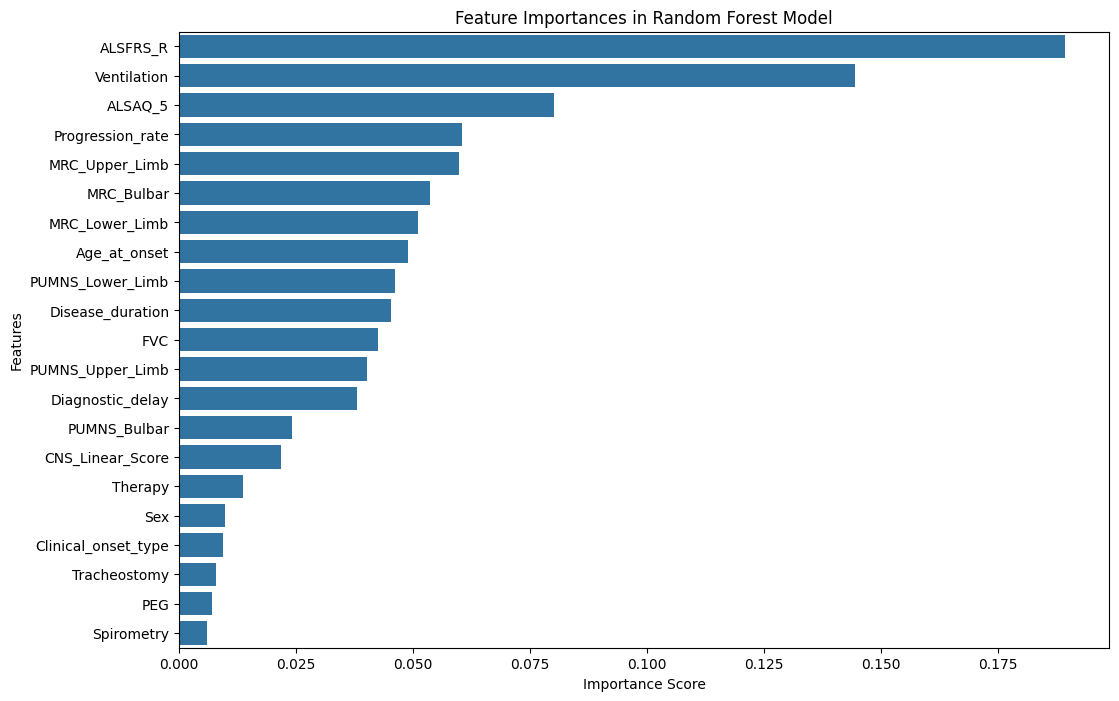

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This code should be run after you have trained your best_model
importances = best_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

# Plot the feature importances for better visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid

param_grid = {
    # Number of trees in the forest
    'n_estimators': [100, 200, 300, 400],

    # The function to measure the quality of a split
    'criterion': ['gini', 'entropy'],

    # The maximum depth of the tree
    'max_depth': [8, 10, 15, 20],

    # The minimum number of samples required to split an internal node
    'min_samples_split': [5, 10, 15],

    # The minimum number of samples required to be at a leaf node
    'min_samples_leaf': [2, 4, 6, 8],

    # The number of features to consider when looking for the best split
    'max_features': ['sqrt', 'log2'],

    # Method of selecting samples for training each tree
    'bootstrap': [True, False],

    # Weights for classes, essential for imbalanced data
    'class_weight': ['balanced', 'balanced_subsample', None]
}

print("Filtering results for test accuracy > 0.798:\n")

# Iterate through each parameter combination
for params in ParameterGrid(param_grid):
    # Initialize and train the RandomForestClassifier model with the current parameters
    model = RandomForestClassifier(random_state=42, **params)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_test_pred = model.predict(X_test)
    # Evaluate the model on the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Check if the test accuracy is greater than 0.798
    if test_accuracy > 0.798:
        print(f"Parameters: {params}")
        # Make predictions on the training set
        y_train_pred = model.predict(X_train)
        # Evaluate the model on the training set
        train_accuracy = accuracy_score(y_train, y_train_pred)
        print(f"Accuracy on training set: {train_accuracy:.4f}")
        print(f"Accuracy on test set: {test_accuracy:.4f}\n")

# Note: This manual approach doesn't perform cross-validation for each parameter set,
# so the accuracy shown is only on the single train/test split.
# The previous GridSearchCV approach provided cross-validation scores for each parameter set.

Filtering results for test accuracy > 0.798:



In [66]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost Classifier model
# You can tune hyperparameters like n_estimators, learning_rate, max_depth, etc.
model_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)

# Adjust the target variable to be 0-indexed for XGBoost
y_train_indexed = y_train - 1
y_test_indexed = y_test - 1


# Train the model using the scaled data
model_xgb.fit(X_train_scaled, y_train_indexed)

# Make predictions on the scaled test set
y_pred_xgb = model_xgb.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_indexed, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Print classification report for more detailed evaluation
print("\nXGBoost Classification Report:")
print(classification_report(y_test_indexed, y_pred_xgb))

XGBoost Accuracy: 0.7774

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        48
           1       0.57      0.62      0.59        53
           2       0.76      0.73      0.75        83
           3       0.91      0.91      0.91        99

    accuracy                           0.78       283
   macro avg       0.76      0.75      0.75       283
weighted avg       0.78      0.78      0.78       283



##LinearModel

###Encoding

In [67]:
from sklearn.preprocessing import LabelEncoder

# Select the 'FVC' column for encoding
fvc_col = ['FVC' , 'Tracheostomy','Spirometry','PEG','Ventilation']

# Apply Label Encoding to the 'FVC' column in df_encoded
for col in fvc_col:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Display the first few rows of the modified DataFrame to verify
display(df_encoded.head())

,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Therapy,Diagnostic_delay,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,0,19.0,3,1,3,0,0,0,1,33.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,0,65.0,3,1,0,0,0,0,3,14.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,1,79.0,0,1,3,0,0,0,3,6.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,0,51.0,3,1,3,0,0,0,1,18.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,0,51.0,3,1,3,0,0,0,1,18.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [68]:
# Select the columns to one-hot encode
cols_to_onehot = ['Therapy', 'Clinical_onset_type']

# Apply one-hot encoding to the selected columns in df_encoded
df_encoded = pd.get_dummies(df_encoded, columns=cols_to_onehot, dtype=int)

# Display the first few rows of the modified DataFrame to verify
display(df_encoded.head())

,Sex,Age_at_onset,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Diagnostic_delay,MRC_Upper_Limb,MRC_Lower_Limb,...,ALSFRS_R,ALSAQ_5,Therapy_0,Therapy_1,Therapy_2,Therapy_3,Clinical_onset_type_0,Clinical_onset_type_1,Clinical_onset_type_2,Clinical_onset_type_3
0,0,19.0,1,3,0,0,0,33.0,61.0,50.0,...,45.0,0.0,0,1,0,0,0,0,0,1
1,0,65.0,1,0,0,0,0,14.0,53.0,58.0,...,38.0,15.0,0,0,0,1,0,0,0,1
2,1,79.0,1,3,0,0,0,6.0,66.0,58.0,...,43.0,20.0,0,0,0,1,1,0,0,0
3,0,51.0,1,3,0,0,0,18.0,51.0,60.0,...,44.0,20.0,0,1,0,0,0,0,0,1
4,0,51.0,1,3,0,0,0,18.0,51.0,60.0,...,45.0,25.0,0,1,0,0,0,0,0,1


###PreProcessing

In [69]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) using the updated df_encoded
X_linear = df_encoded.drop('KINGS_Total', axis=1)
y_linear = df_encoded['KINGS_Total']

# Split data into training and testing sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

print("Training set shape:", X_train_linear.shape)
print("Testing set shape:", X_test_linear.shape)

Training set shape: (1129, 27)
Testing set shape: (283, 27)


In [70]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_linear = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_linear_scaled = scaler_linear.fit_transform(X_train_linear)
X_test_linear_scaled = scaler_linear.transform(X_test_linear)

print("Training data shape after scaling:", X_train_linear_scaled.shape)
print("Testing data shape after scaling:", X_test_linear_scaled.shape)

Training data shape after scaling: (1129, 27)
Testing data shape after scaling: (283, 27)


###Modeling

In [71]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM Classifier model
# You can tune hyperparameters like C, kernel, gamma, etc.
model_svm = SVC(random_state=42)

# Train the model using the scaled data
model_svm.fit(X_train_linear_scaled, y_train_linear)

# Make predictions on the scaled test set
y_pred_svm = model_svm.predict(X_test_linear_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test_linear, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

# Print classification report for more detailed evaluation
print("\nSVM Classification Report:")
print(classification_report(y_test_linear, y_pred_svm))

SVM Accuracy: 0.7350

SVM Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.60      0.61        48
           2       0.51      0.62      0.56        53
           3       0.84      0.63      0.72        83
           4       0.86      0.95      0.90        99

    accuracy                           0.73       283
   macro avg       0.71      0.70      0.70       283
weighted avg       0.75      0.73      0.73       283



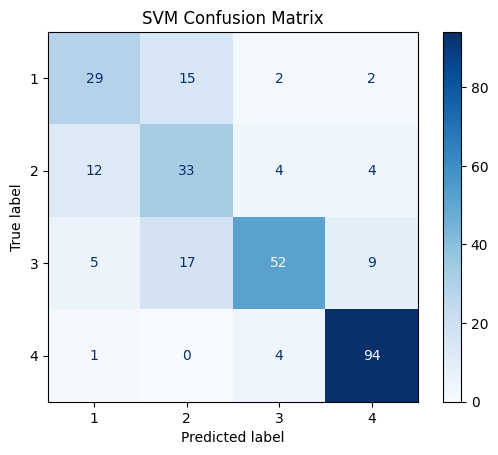

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions with the SVM model
y_pred_svm = model_svm.predict(X_test_linear_scaled)

# Generate the confusion matrix
cm_svm = confusion_matrix(y_test_linear, y_pred_svm)

# Plot the confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=model_svm.classes_)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.show()

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# Define the model
model_ann = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_linear_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(y_train_linear.unique()), activation='softmax') # Output layer with softmax for multi-class classification
])

# Compile the model
model_ann.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
                  metrics=['accuracy'])

# Adjust the target variable to be 0-indexed for ANN
y_train_linear_indexed = y_train_linear - 1
y_test_linear_indexed = y_test_linear - 1

# Train the model
history = model_ann.fit(X_train_linear_scaled, y_train_linear_indexed, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
loss, accuracy_ann = model_ann.evaluate(X_test_linear_scaled, y_test_linear_indexed, verbose=0)
print(f"ANN Accuracy: {accuracy_ann:.4f}")

# Make predictions and print classification report
y_pred_ann = model_ann.predict(X_test_linear_scaled)
y_pred_ann_classes = tf.argmax(y_pred_ann, axis=1)

print("\nANN Classification Report:")
# Use the original y_test_linear for the classification report labels for clarity
print(classification_report(y_test_linear_indexed, y_pred_ann_classes))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN Accuracy: 0.7668
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

ANN Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        48
           1       0.55      0.64      0.59        53
           2       0.83      0.69      0.75        83
           3       0.94      0.93      0.93        99

    accuracy                           0.77       283
   macro avg       0.74      0.74      0.74       283
weighted avg       0.78      0.77      0.77       283



In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# Define the model
model_nn = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_linear_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(len(y_train_linear.unique()), activation='softmax') # Output layer with softmax for multi-class classification
])

# Compile the model
model_nn.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
                 metrics=['accuracy'])

# Display the model summary
model_nn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,492 (5.83 KB)

 Trainable params: 1,492 (5.83 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
X_train.columns.size

21

In [75]:
# Adjust the target variable to be 0-indexed for training
y_train_linear_indexed = y_train_linear - 1
y_test_linear_indexed = y_test_linear - 1

# Train the model
history = model_nn.fit(X_train_linear_scaled, y_train_linear_indexed, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy_nn = model_nn.evaluate(X_test_linear_scaled, y_test_linear_indexed, verbose=0)
print(f"\nNeural Network Accuracy: {accuracy_nn:.4f}")

# Make predictions and print classification report
y_pred_nn = model_nn.predict(X_test_linear_scaled)
y_pred_nn_classes = tf.argmax(y_pred_nn, axis=1)

print("\nNeural Network Classification Report:")
print(classification_report(y_test_linear_indexed, y_pred_nn_classes))

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2917 - loss: 1.4973 - val_accuracy: 0.4779 - val_loss: 1.2125
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4717 - loss: 1.1853 - val_accuracy: 0.5796 - val_loss: 1.0825
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5427 - loss: 1.0863 - val_accuracy: 0.6106 - val_loss: 0.9978
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6082 - loss: 0.9831 - val_accuracy: 0.6239 - val_loss: 0.9279
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6108 - loss: 0.9238 - val_accuracy: 0.6372 - val_loss: 0.8712
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6526 - loss: 0.8749 - val_accuracy: 0.6726 - val_loss: 0.8174
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6685 - loss: 0.8330 - val_accuracy: 0.6770 - val_loss: 0.7723
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6998 - loss: 0.7807 - val_accuracy: 0.7035 - val_loss

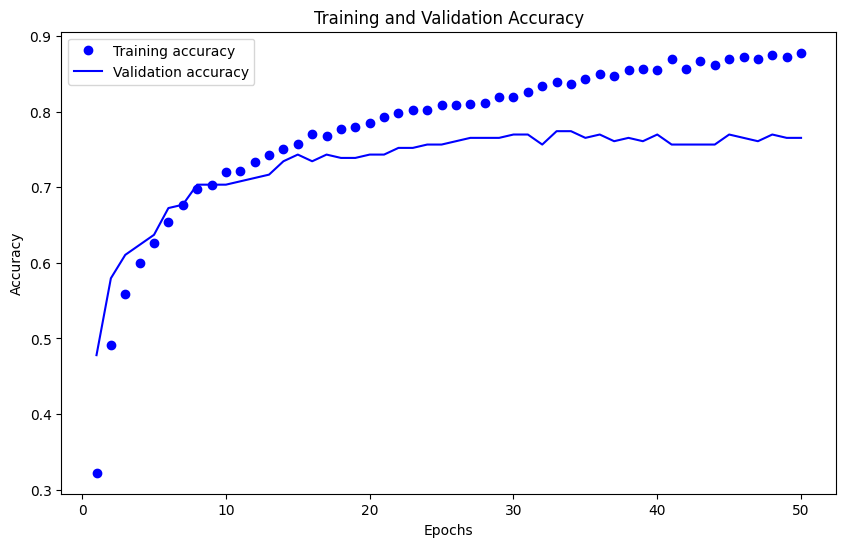

In [76]:
import matplotlib.pyplot as plt

# Get the accuracy from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

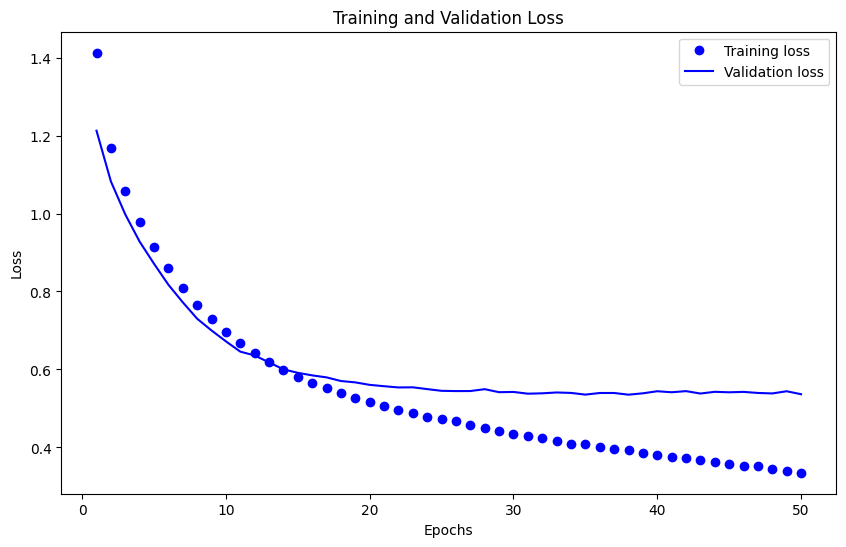

In [77]:
import matplotlib.pyplot as plt

# Get the loss from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()